In [1]:
["work_interfere_non_effective_treatment", "diagnosed_disorder", "work_interfere_effective_treatment", "current_disorder", "family_history", "past_disorder", "care_options", "friends_family"]

['work_interfere_non_effective_treatment',
 'diagnosed_disorder',
 'work_interfere_effective_treatment',
 'current_disorder',
 'family_history',
 'past_disorder',
 'care_options',
 'friends_family']

In [2]:
len(["work_interfere_non_effective_treatment", "diagnosed_disorder", "work_interfere_effective_treatment", "current_disorder", "family_history", "past_disorder", "care_options", "friends_family"])

8

In [31]:
import pandas as pd

df = pd.read_csv("data/2020 telco churn data.csv")

In [32]:
convert_to_binary = ["international_plan", "voice_mail_plan", "churn"]
for i in convert_to_binary:
    df[i] = df[i].map({"no":0, "yes": 1})

In [33]:
cols_to_mean = ['account_length','number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls']

for col in cols_to_mean:
    mean = df[col].mean()
    df[col] = [1 if i > mean else 0 for i in df[col]]

In [34]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,1,area_code_415,0,1,1,0,1,0,0,1,0,1,1,1,1,0,1,0,0
1,NJ,1,area_code_415,0,0,0,1,1,1,0,1,0,0,1,0,1,1,1,0,0
2,OH,0,area_code_408,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
3,OK,0,area_code_415,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
4,MA,1,area_code_510,0,1,1,1,0,1,1,1,1,1,1,1,0,1,0,1,0


In [35]:
df.drop(["state", "area_code"], axis = 1, inplace=True)

In [36]:
df.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,0,1,1,0,1,0,0,1,0,1,1,1,1,0,1,0,0
1,1,0,0,0,1,1,1,0,1,0,0,1,0,1,1,1,0,0
2,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
3,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
4,1,0,1,1,1,0,1,1,1,1,1,1,1,0,1,0,1,0


LR: 0.862 (0.015)
DT: 0.861 (0.018)
RF: 0.862 (0.017)
Ada: 0.860 (0.015)
NB: 0.846 (0.021)
KMeans: 0.843 (0.011)
LDA: 0.852 (0.019)
MLP: 0.858 (0.020)


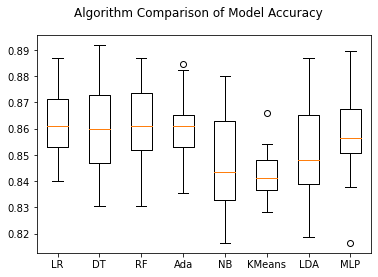

In [38]:
# Compare Algorithms
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

df=df.dropna()
X = df.drop("churn", axis = 1)  
Y = df['churn'] 
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []

models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=10000)))
models.append(('DT', DecisionTreeClassifier(max_depth=6)))
models.append(('RF', RandomForestClassifier(max_depth=6)))
models.append(('Ada', AdaBoostClassifier()))
models.append(('NB', GaussianNB()))
models.append(('KMeans', KNeighborsClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('MLP', MLPClassifier(hidden_layer_sizes=(10,10,10),max_iter=5000)))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = f"{name}: {cv_results.mean():.3f} ({cv_results.std():.3f})"
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison of Model Accuracy')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

<AxesSubplot:>

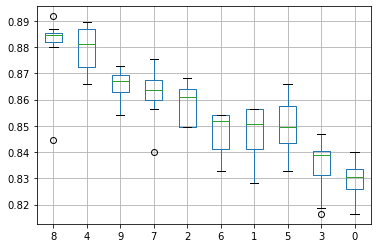

In [42]:
df2 = pd.DataFrame(results)
meds = df2.median()
meds.sort_values(ascending=True, inplace=True)
results = df2[meds.index]
df2.boxplot()



In [40]:
results

[array([0.84      , 0.85647059, 0.86117647, 0.84235294, 0.88705882,
        0.86588235, 0.85176471, 0.86117647, 0.88470588, 0.87294118]),
 array([0.83058824, 0.85647059, 0.86352941, 0.84      , 0.88      ,
        0.84470588, 0.85411765, 0.87294118, 0.89176471, 0.87294118]),
 array([0.83058824, 0.85176471, 0.86823529, 0.84705882, 0.88705882,
        0.85176471, 0.85411765, 0.87529412, 0.88470588, 0.86823529]),
 array([0.83529412, 0.85647059, 0.86117647, 0.84      , 0.88235294,
        0.86117647, 0.85176471, 0.86352941, 0.88470588, 0.86588235]),
 array([0.81882353, 0.83764706, 0.84941176, 0.81647059, 0.87058824,
        0.83294118, 0.83294118, 0.86352941, 0.88      , 0.86117647]),
 array([0.82823529, 0.82823529, 0.84941176, 0.83529412, 0.86588235,
        0.84      , 0.84235294, 0.84      , 0.84470588, 0.85411765]),
 array([0.83294118, 0.84235294, 0.84941176, 0.81882353, 0.87294118,
        0.84705882, 0.83764706, 0.86588235, 0.88705882, 0.86352941]),
 array([0.81647059, 0.84941176, 0.

In [49]:
# Importing the required Python libraries
import numpy as np
import pandas as pd
import pickle
from sklearn.ensemble import RandomForestClassifier


df=df.dropna()
X = df.drop("churn", axis = 1)  
y = df['churn'] 
# prepare configuration for cross validation test harness
seed = 7

# Instantiating a Logistic Regression (LR) model
model = RandomForestClassifier(max_depth=3)

model.fit(X, y)

# Saving the model to a serialized .pkl file
pkl_filename = "model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

In [72]:
churn = df[df["churn"]==1]

In [73]:
churn.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_eve_calls,number_customer_service_calls,churn
8,0,0,0,0,1,0,1,1
12,1,0,0,0,0,0,1,1
17,0,0,0,0,0,1,1,1
26,0,0,0,0,1,1,0,1
32,1,1,1,1,0,1,0,1
